In [1]:
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras

In [2]:
data_dir = 'manual'
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=10,
    height_shift_range=10,
)
flow_params = {
    'class_mode': 'sparse',
    'color_mode': 'grayscale',
    'target_size': (128, 128),
#     'batch_size': batch_size,
}
test_it = datagen.flow_from_directory(data_dir, **flow_params)

Found 98 images belonging to 6 classes.


2022-03-06 09:13:00.463919: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-03-06 09:13:00.482858: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1700865000 Hz
2022-03-06 09:13:00.483411: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55a17e2d2d70 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-03-06 09:13:00.483438: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-03-06 09:13:00.492452: I tensorflow/core/common_runtime/process_util.cc:147] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


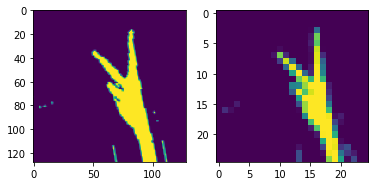

In [3]:
Xtrain, _ = test_it.next()
_, (ax1, ax2) = plt.subplots(1, 2)
X = Xtrain[0]
ax1.imshow(X)
ax2.imshow(keras.layers.AveragePooling2D(5)(Xtrain)[0])
plt.show()

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(64, 3, input_shape=(128, 128, 1)),
    keras.layers.MaxPooling2D(3),
    keras.layers.Conv2D(64, 3),
    keras.layers.MaxPooling2D(3),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(6, activation='softmax'),
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 64)      640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 40, 40, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               2769152   
_________________________________________________________________
dense_12 (Dense)             (None, 256)              

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4 steps, validate for 4 steps
Epoch 1/50
4/4 [==============================] - 6s 1s/step - loss: 48.9760 - accuracy: 0.1531 - val_loss: 13.4934 - val_accuracy: 0.2449
Epoch 2/50
4/4 [==============================] - 5s 1s/step - loss: 16.0293 - accuracy: 0.2143 - val_loss: 17.4732 - val_accuracy: 0.2143
Epoch 3/50
4/4 [==============================] - 5s 1s/step - loss: 17.4211 - accuracy: 0.1735 - val_loss: 15.5643 - val_accuracy: 0.3469
Epoch 4/50
4/4 [==============================] - 6s 1s/step - loss: 10.7366 - accuracy: 0.3673 - val_loss: 10.0283 - val_accuracy: 0.3163
Epoch 5/50
4/4 [==============================] - 6s 1s/step - loss: 14.1955 - accuracy: 0.3367 - val_loss: 8.4015 - val_accuracy: 0.2755
Epoch 6/50
4/4 [==============================] - 5s 1s/step - loss: 7.3225 - accuracy: 0.3571 - val_loss: 5.8285 - val_accuracy: 0.3980
Epoch 7/50
4/4 [==============================] - 5s 1s/step - loss: 9.3315 - a

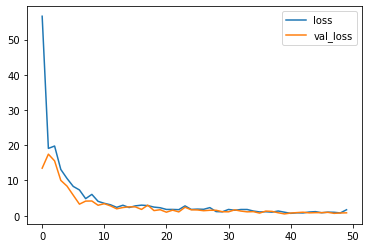

In [14]:
history = model.fit(test_it, validation_data=test_it, epochs=50)
df = pd.DataFrame(history.history)
df[['loss', 'val_loss']].plot()
plt.show()

In [15]:
model.save('manualmodel70')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2022-03-06 09:29:50.030559: W tensorflow/python/util/util.cc:319] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: manualmodel70/assets


In [ ]:
import keract
activations = keract.get_activations(model, test_it, auto_compile=True)
keract.display_activations(activations, cmap=None, save=False, directory='.', data_format='channels_last', fig_size=(24, 24), reshape_1d_layers=False)